These results are for the multinomial model without sentence transformers
Accuracy of each fold is...
[0.70238095 0.5952381  0.60240964 0.6626506  0.62650602 0.6746988
 0.61445783 0.62650602 0.71084337 0.55421687]
average of the folds is...
0.6369908204245552

Below is the predictions of an example fold, and it's associated confusion Matrix!
Have fun looking through and seeing what the model predicted!
Tier                     "OU"
Predictions              "UU"
Pokemon Name       "Ribombee"
Base Stat Total           465
Name: 955, dtype: object
Tier                     "ZU"
Predictions              "ZU"
Pokemon Name       "Shroodle"
Base Stat Total           290
Name: 1035, dtype: object
Tier                   "UU"
Predictions            "RU"
Pokemon Name       "Zapdos"
Base Stat Total         580
Name: 1364, dtype: object
Tier                    "ZU"
Predictions             "ZU"
Pokemon Name       "Sunkern"
Base Stat Total          180
Name: 1130, dtype: object
Tier                   

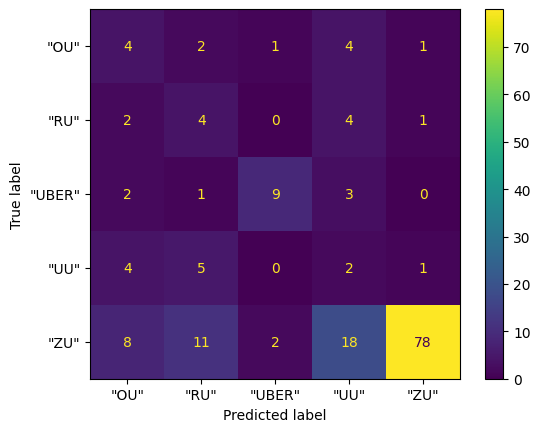

In [32]:
#Predicting Tier based off features
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
#Change this to your path to the CSV
data = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
#features = ["Legendary Type","Primary Type","Secondary Type","Game(s) of Origin","Health Stat","Attack Stat","Defense Stat","Special Attack Stat","Special Defense Stat","Speed Stat","Base Stat Total"]
data = data.dropna(subset="Tier")
irrelevantFeatures = ["Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      "Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                        "Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

#I removed "Pokemon Name" from above so I could check what pokemon where catogorized as what
data = data.drop(labels=irrelevantFeatures,axis=1)
#Below I removed legendary type as a feature for a giggle.
data = pd.get_dummies(data,columns=["Legendary Type","Primary Type","Secondary Type"])
#data = pd.get_dummies(data,columns=["Primary Type","Secondary Type"])
features = data.columns.values[2:]
#print(features)

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


trainData, testData = train_test_split(data,test_size=0.2)
trainX = np.array(trainData[features])
testX = np.array(testData[features])
trainY = np.array(trainData["Tier"])
testY = np.array(testData["Tier"])


#Setting up the Multinomial Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',solver ='newton-cg',class_weight="balanced")
#Setting up Kfold
kFold = StratifiedKFold(n_splits=10,shuffle=True)
scores = cross_val_score(model,data[features],data["Tier"],scoring='accuracy',cv=kFold)
print("These results are for the multinomial model without sentence transformers")
print("Accuracy of each fold is...")
print(scores)
print("average of the folds is...")
print(scores.mean())
print()
print("Below is the predictions of an example fold, and it's associated confusion Matrix!")
print("Have fun looking through and seeing what the model predicted!")




model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
for i, row in testData.iterrows():
    print(row[["Tier","Predictions","Pokemon Name","Base Stat Total"]])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
conf_matr = confusion_matrix(testData["Tier"],testData["Predictions"])
disp = ConfusionMatrixDisplay(conf_matr,display_labels=model.classes_)
accuracyNumber = accuracy_score(testY,predictions)
print()
print("Accuracy =")
print(accuracyNumber)
disp.plot()
plt.show()



In [33]:
#This box of code outputs the coefficients of the trained model. It's great fun identifyinig what the model has prioritized as relevant in each tier.
#My competitive friends assure me that Ice is generally considered one of the weaker types, and fairy is univerasally considered the strongest. 
#Note that Fairy having a possitive coefficient is common in the higher tiers, and ice has a positive coefficient in the low tiers.
print("This is the coefficients associated with each tier")
numberOfCoefs = 4
for i, tier in enumerate(model.classes_):
    print(tier)
    sortedCoefs = np.argsort(model.coef_[i])
    print("Negative coefficients")
    for k, coefficientIndex in enumerate(sortedCoefs[:numberOfCoefs]):
        print(features[coefficientIndex])
        print(model.coef_[i, coefficientIndex])
    print("Positive coefficients")
    for k, coefficientIndex in enumerate(sortedCoefs[-numberOfCoefs:]):
        print(features[coefficientIndex])
        print(model.coef_[i, coefficientIndex])
        


This is the coefficients associated with each tier
"OU"
Negative coefficients
Primary Type_"Ghost"
-1.2980409416926786
Primary Type_"Ice"
-1.287167686666104
Legendary Type_"Mythical"
-1.221832687298712
Primary Type_"Normal"
-1.0714272254119324
Positive coefficients
Primary Type_"Ground"
0.7371917491636314
Primary Type_"Fairy"
1.0673245351726466
Primary Type_"Rock"
1.1163492220975342
Secondary Type_"Ground"
1.3258188815696388
"RU"
Negative coefficients
Secondary Type_"Dark"
-1.6198764306096183
Secondary Type_"Dragon"
-1.2565882935792023
Secondary Type_"Fire"
-1.0408365439524236
Primary Type_"Ground"
-0.9972328319006261
Positive coefficients
Secondary Type_"Fighting"
1.096157369384226
Primary Type_"Bug"
1.174295744267891
Primary Type_"Normal"
1.2860585553761574
Secondary Type_"Bug"
1.6017191218633966
"UBER"
Negative coefficients
Secondary Type_"Psychic"
-1.1902486546562039
Secondary Type_"Fighting"
-1.0944006676022988
Primary Type_"Bug"
-0.8347751707972783
Primary Type_"Ground"
-0.735422

These results are for the multinomial model WITH sentence transformers
Accuracy of each fold is...
[0.63095238 0.5952381  0.6626506  0.72289157 0.57831325 0.6746988
 0.69879518 0.72289157 0.71084337 0.6746988 ]
average of the folds is...
0.6671973608720597

Below is the predictions of an example fold, and it's associated confusion Matrix!
Have fun looking through and seeing what the model predicted!
Tier                      "ZU"
Predictions               "ZU"
Pokemon Name       "Charcadet"
Base Stat Total            255
Name: 165, dtype: object
Tier                     "OU"
Predictions              "ZU"
Pokemon Name       "Clodsire"
Base Stat Total           430
Name: 197, dtype: object
Tier                    "ZU"
Predictions             "RU"
Pokemon Name       "Mesprit"
Base Stat Total          580
Name: 730, dtype: object
Tier                      "ZU"
Predictions               "RU"
Pokemon Name       "Farigiraf"
Base Stat Total            520
Name: 358, dtype: object
Tier         

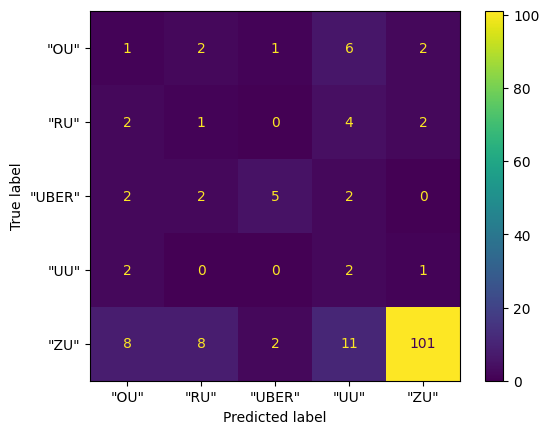

In [34]:
from sentence_transformers import SentenceTransformer

sentencesToVectors = SentenceTransformer("all-MiniLM-L6-v2")
#Change this to your path to the CSV
dataAgain = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
dataAgain = dataAgain.dropna(subset="Tier")

irrelevantFeatures = ["Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      #"Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                      "Pokemon Weight", "Primary Ability", "Secondary Ability", 
                        #"Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                        "Hidden Ability", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

dataAgain = dataAgain.drop(labels=irrelevantFeatures,axis=1)
dataAgain = pd.get_dummies(dataAgain,columns=["Primary Type","Secondary Type", "Legendary Type"])
features = dataAgain.columns.values[5:]
#abilityFeatures = dataAgain.columns.values[2:5]
#print(features)
#print(abilityFeatures)

#x = np.array(data[features])
#y = np.array(data["Tier"])
#print(x)
#print(y)


dataAgain = dataAgain.fillna(value="")

allFeatures = dataAgain[features]
PrimaryEmbedings = sentencesToVectors.encode(list(dataAgain["Primary Ability Description"]))
SecondaryEmbedings = sentencesToVectors.encode(list(dataAgain["Secondary Ability Description"]))
HiddenEmbedings = sentencesToVectors.encode(list(dataAgain["Hidden Ability Description"]))

allFeatures = np.hstack([allFeatures, PrimaryEmbedings, SecondaryEmbedings, HiddenEmbedings])
allLabels = np.array(dataAgain["Tier"])

# This code can be used to do a single train_test_split.
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(dataAgain,test_size=0.2)

trainX = np.array(trainData[features])
trainPrimaryEmbedings = sentencesToVectors.encode(list(trainData["Primary Ability Description"]))
trainSecondaryEmbedings = sentencesToVectors.encode(list(trainData["Secondary Ability Description"]))
trainHiddenEmbedings = sentencesToVectors.encode(list(trainData["Hidden Ability Description"]))
trainX = np.hstack([trainX, trainPrimaryEmbedings, trainSecondaryEmbedings, trainHiddenEmbedings])

testX = np.array(testData[features])
testPrimaryEmbedings = sentencesToVectors.encode(list(testData["Primary Ability Description"]))
testSecondaryEmbedings = sentencesToVectors.encode(list(testData["Secondary Ability Description"]))
testHiddenEmbedings = sentencesToVectors.encode(list(testData["Hidden Ability Description"]))
testX = np.hstack([testX, testPrimaryEmbedings, testSecondaryEmbedings, testHiddenEmbedings])

trainY = np.array(trainData["Tier"])
testY = np.array(testData["Tier"])


from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',solver ='newton-cg',class_weight="balanced")
#Setting up Kfold
kFold = StratifiedKFold(n_splits=10,shuffle=True)
#Damn the folds take forever because theres so many features lmaoooo
scores = cross_val_score(model,allFeatures,allLabels,scoring='accuracy',cv=kFold)
print("These results are for the multinomial model WITH sentence transformers")
print("Accuracy of each fold is...")
print(scores)
print("average of the folds is...")
print(scores.mean())
print()
print("Below is the predictions of an example fold, and it's associated confusion Matrix!")
print("Have fun looking through and seeing what the model predicted!")

model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
for i, row in testData.iterrows():
    print(row[["Tier","Predictions","Pokemon Name","Base Stat Total"]])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
conf_matr = confusion_matrix(testData["Tier"],testData["Predictions"])
disp = ConfusionMatrixDisplay(conf_matr,display_labels=model.classes_)
accuracyNumber = accuracy_score(testY,predictions)
print()
print("Accuracy =")
print(accuracyNumber)
disp.plot()
plt.show()

In [35]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
#Change this to your path to the CSV
data = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
#data = data.dropna(subset="Tier")
uniqueGames = data["Game(s) of Origin"].unique()
#print(uniqueGames)
gameToGen = {'"Diamond"':4,'"X"':6,'"Red"':1,'"Ruby"':3,'"Black"':5,'"Gold"':2,
    '"Sword"':8,'"Omega Ruby"':6,'"Scarlet"':9,'"Sun"':7,'"Legends Arceus"':8,
    '"Ultra Sun"':7,'"Fire Red"':3,'"Leaf Green"':3,'"Emerald"':3,'"Let\'s Go Pikachu"':7,'"Pokémon GO"':7,
    '"Platinum"':4,'"Violet"':8,'"Black 2"':5}
data["Gen"] = data["Game(s) of Origin"].apply(lambda x:gameToGen[x])

#data.loc[~data.index.isin(data.dropna(subset="Evolution Details").index)]

irrelevantFeatures = ["Tier", "Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      "Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                        "Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

data = data.drop(labels=irrelevantFeatures,axis=1)
#Below I removed legendary type 
data = pd.get_dummies(data,columns=["Legendary Type","Primary Type","Secondary Type"])
#data = pd.get_dummies(data,columns=["Primary Type","Secondary Type"])
#print(data.columns.values[2:])
#features = data.columns.values[2:]
features = [
    'Health Stat', 'Attack Stat', 'Defense Stat',
    'Special Attack Stat', 'Special Defense Stat', 'Speed Stat',
    'Base Stat Total', 'Primary Type_"Bug"', 'Primary Type_"Dark"',
    'Primary Type_"Dragon"', 'Primary Type_"Electric"', 'Primary Type_"Fairy"',
    'Primary Type_"Fighting"', 'Primary Type_"Fire"', 'Primary Type_"Flying"',
    'Primary Type_"Ghost"', 'Primary Type_"Grass"', 'Primary Type_"Ground"',
    'Primary Type_"Ice"', 'Primary Type_"Normal"', 'Primary Type_"Poison"',
    'Primary Type_"Psychic"', 'Primary Type_"Rock"', 'Primary Type_"Steel"',
    'Primary Type_"Water"', 'Secondary Type_"Bug"', 'Secondary Type_"Dark"',
    'Secondary Type_"Dragon"', 'Secondary Type_"Electric"',
    'Secondary Type_"Fairy"', 'Secondary Type_"Fighting"',
    'Secondary Type_"Fire"', 'Secondary Type_"Flying"',
    'Secondary Type_"Ghost"', 'Secondary Type_"Grass"',
    'Secondary Type_"Ground"', 'Secondary Type_"Ice"',
    'Secondary Type_"Normal"', 'Secondary Type_"Poison"',
    'Secondary Type_"Psychic"', 'Secondary Type_"Rock"',
    'Secondary Type_"Steel"', 'Secondary Type_"Water"', 'Legendary Type_"Legendary"',
    'Legendary Type_"Mythical"', 'Legendary Type_"Sub-Legendary"'
]
#print(features)

from sklearn.model_selection import train_test_split
#trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)


trainData, testData = train_test_split(data,test_size=0.2)
trainX = np.array(trainData[features])
testX = np.array(testData[features])
trainY = np.array(trainData["Gen"])
testY = np.array(testData["Gen"])

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model=Ridge(alpha=0.1)


model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
print("Root Mean squared error =")
print(np.sqrt(mean_squared_error(testY, predictions)))
for i, row in testData.iterrows():
    print(row[["Pokemon Name","Gen","Predictions"]])
print("The variance was:")
print(np.var(predictions))

Root Mean squared error =
2.500130799901444
Pokemon Name    "Piloswine"
Gen                       2
Predictions        4.915833
Name: 875, dtype: object
Pokemon Name    "Voltorb"
Gen                     1
Predictions       4.61857
Name: 1308, dtype: object
Pokemon Name    "Frogadier"
Gen                       6
Predictions        3.859248
Name: 403, dtype: object
Pokemon Name     "Unown"
Gen                    2
Predictions     3.611223
Name: 1225, dtype: object
Pokemon Name    "Grimmsnarl"
Gen                        8
Predictions         6.982858
Name: 494, dtype: object
Pokemon Name    "Exeggutor"
Gen                       1
Predictions        5.697478
Name: 350, dtype: object
Pokemon Name    "Mewtwo"
Gen                    6
Predictions     4.952341
Name: 738, dtype: object
Pokemon Name    "Woobat"
Gen                    5
Predictions     3.863196
Name: 1337, dtype: object
Pokemon Name    "Ninjask"
Gen                     3
Predictions      5.453991
Name: 802, dtype: object
Pokemon 

In [37]:
from sentence_transformers import SentenceTransformer

sentencesToVectors = SentenceTransformer("all-MiniLM-L6-v2")

import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
#Change this to your path to the CSV
data = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
#data = data.dropna(subset="Tier")
uniqueGames = data["Game(s) of Origin"].unique()
#print(uniqueGames)
gameToGen = {'"Diamond"':4,'"X"':6,'"Red"':1,'"Ruby"':3,'"Black"':5,'"Gold"':2,
    '"Sword"':8,'"Omega Ruby"':6,'"Scarlet"':9,'"Sun"':7,'"Legends Arceus"':8,
    '"Ultra Sun"':7,'"Fire Red"':3,'"Leaf Green"':3,'"Emerald"':3,'"Let\'s Go Pikachu"':7,'"Pokémon GO"':7,
    '"Platinum"':4,'"Violet"':8,'"Black 2"':5}
data["Gen"] = data["Game(s) of Origin"].apply(lambda x:gameToGen[x])

#data.loc[~data.index.isin(data.dropna(subset="Evolution Details").index)]

irrelevantFeatures = ["Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      #"Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                      "Pokemon Weight", "Primary Ability", "Secondary Ability", 
                        #"Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                        "Hidden Ability", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

data = data.drop(labels=irrelevantFeatures,axis=1)
data = data.fillna(value="") #Dont forget this or the sentence transformer will see a NaN and explode
#Below I removed legendary type 
data = pd.get_dummies(data,columns=["Legendary Type","Primary Type","Secondary Type"])
#data = pd.get_dummies(data,columns=["Primary Type","Secondary Type"])
#print(data.columns.values[2:])
#features = data.columns.values[2:]
features = [
    'Health Stat', 'Attack Stat', 'Defense Stat',
    'Special Attack Stat', 'Special Defense Stat', 'Speed Stat',
    'Base Stat Total', 'Primary Type_"Bug"', 'Primary Type_"Dark"',
    'Primary Type_"Dragon"', 'Primary Type_"Electric"', 'Primary Type_"Fairy"',
    'Primary Type_"Fighting"', 'Primary Type_"Fire"', 'Primary Type_"Flying"',
    'Primary Type_"Ghost"', 'Primary Type_"Grass"', 'Primary Type_"Ground"',
    'Primary Type_"Ice"', 'Primary Type_"Normal"', 'Primary Type_"Poison"',
    'Primary Type_"Psychic"', 'Primary Type_"Rock"', 'Primary Type_"Steel"',
    'Primary Type_"Water"', 'Secondary Type_"Bug"', 'Secondary Type_"Dark"',
    'Secondary Type_"Dragon"', 'Secondary Type_"Electric"',
    'Secondary Type_"Fairy"', 'Secondary Type_"Fighting"',
    'Secondary Type_"Fire"', 'Secondary Type_"Flying"',
    'Secondary Type_"Ghost"', 'Secondary Type_"Grass"',
    'Secondary Type_"Ground"', 'Secondary Type_"Ice"',
    'Secondary Type_"Normal"', 'Secondary Type_"Poison"',
    'Secondary Type_"Psychic"', 'Secondary Type_"Rock"',
    'Secondary Type_"Steel"', 'Secondary Type_"Water"', 'Legendary Type_"Legendary"',
    'Legendary Type_"Mythical"', 'Legendary Type_"Sub-Legendary"'
]
#print(features)

from sklearn.model_selection import train_test_split
#trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)


trainData, testData = train_test_split(data,test_size=0.2)
#Attempting to add Sentence transformers

trainX = np.array(trainData[features])
trainPrimaryEmbedings = sentencesToVectors.encode(list(trainData["Primary Ability Description"]))
trainSecondaryEmbedings = sentencesToVectors.encode(list(trainData["Secondary Ability Description"]))
trainHiddenEmbedings = sentencesToVectors.encode(list(trainData["Hidden Ability Description"]))
trainX = np.hstack([trainX, trainPrimaryEmbedings, trainSecondaryEmbedings, trainHiddenEmbedings])

testX = np.array(testData[features])
testPrimaryEmbedings = sentencesToVectors.encode(list(testData["Primary Ability Description"]))
testSecondaryEmbedings = sentencesToVectors.encode(list(testData["Secondary Ability Description"]))
testHiddenEmbedings = sentencesToVectors.encode(list(testData["Hidden Ability Description"]))
testX = np.hstack([testX, testPrimaryEmbedings, testSecondaryEmbedings, testHiddenEmbedings])

trainY = np.array(trainData["Gen"])
testY = np.array(testData["Gen"])


#Without sentance transformer code
# trainX = np.array(trainData[features])
# testX = np.array(testData[features])
# trainY = np.array(trainData["Gen"])
# testY = np.array(testData["Gen"])

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model=Ridge(alpha=0.1)


model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
print("Root Mean squared error =")
print(np.sqrt(mean_squared_error(testY, predictions)))
for i, row in testData.iterrows():
    print(row[["Pokemon Name","Gen","Predictions"]])

print("The variance was:")
print(np.var(predictions))

Root Mean squared error =
1.9263276715249074
Pokemon Name    "Swinub"
Gen                    2
Predictions     2.704767
Name: 1139, dtype: object
Pokemon Name    "Mawile"
Gen                    3
Predictions     3.796395
Name: 712, dtype: object
Pokemon Name    "Kadabra"
Gen                     1
Predictions      0.948034
Name: 580, dtype: object
Pokemon Name    "Slowbro"
Gen                     8
Predictions      6.328041
Name: 1068, dtype: object
Pokemon Name    "Chingling"
Gen                       4
Predictions        2.281429
Name: 185, dtype: object
Pokemon Name    "Roggenrola"
Gen                        5
Predictions         4.580582
Name: 961, dtype: object
Pokemon Name    "Basculin"
Gen                      8
Predictions       7.578115
Name: 79, dtype: object
Pokemon Name    "Steenee"
Gen                     7
Predictions      4.470462
Name: 1120, dtype: object
Pokemon Name     "Unown"
Gen                    2
Predictions     2.407033
Name: 1235, dtype: object
Pokemon Name    